# Downfall of Using Tree Based Methods

## Why Tree-Based Methods Struggle in Time Series Forecasting
1. __No Extrapolation Beyond Training Data:__ Tree-based models, including Random Forest, Decision Trees, and Gradient Boosting Trees, are excellent at capturing patterns within the range of the training data. However, they are not designed for forecasting beyond the observed values. When time series data have long-term trends, such as a linear or exponential growth, these models fail to predict future values accurately, as they cannot "extrapolate" into future unseen data points.
2. __Dependence on Historical Lags:__ limited when it comes to forecasting multiple time periods ahead in time. The reason is that these models predict each time step independently based on the features available at the time of training. If we want to forecast multiple time periods into the future, we cannot use a single model for all future periods at once. Essentially, tree based algorithms are not capable of extrapolating multiple time periods in the future.

To illustrate consider the following example. This is an example of a linearly increasing time series.ls

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import altair as alt

In [2]:
df = pd.DataFrame({'x': np.linspace(0, 70, 71)}).reset_index()
df['y'] = df['x'] * 10

alt.Chart(df).mark_line().encode(x = 'x', y = 'y')

alt.Chart(...)

This requires us to drop the first record because it has no feature values. If you decide to use more lagged variables, you will have to omit the first N observations.
49

In [3]:
# Split the data into training and testing sets
train = df[df.index < 50].copy()
test = df[df.index >= 50].copy()

In [4]:
# Train the Random Forest model
rf = RandomForestRegressor()
rf = rf.fit(X=train[['x']], y=train['y'])

In [5]:
# Predict on the training and testing sets using the same feature name 'x'
train['pred'] = rf.predict(train[['x']])
test['pred'] = rf.predict(test[['x']])

In [6]:
# Combine the train and test predictions for visualization
chart_data = pd.concat([train, test])
chart_data = pd.melt(chart_data, id_vars='x', value_vars=['y', 'pred'])

# Visualize the results
alt.Chart(chart_data).mark_line().encode(x='x', y='value', color='variable')


alt.Chart(...)

In the training set model do not have the access to the values of test data. The latest x values it access is t = 49. In the end of the training dataset we have a value of 49 which if we were forecasting multiple time periods in the future would be the latest estimate for the value. Therefore the x value in the testing set would be 49.

If we wanted to use tree based models for trying to use one model to forecast multiple time periods, we need to setup the model differently while training. We would have to use a separate tree based model for every unique time period we want to forecast. For example, if we needed the forecast for the next six hours, we would have to build separate models for hr + 1, hr + 2, hr + 3, hr + 4, hr + 5, and hr + 6

# Validation of Models

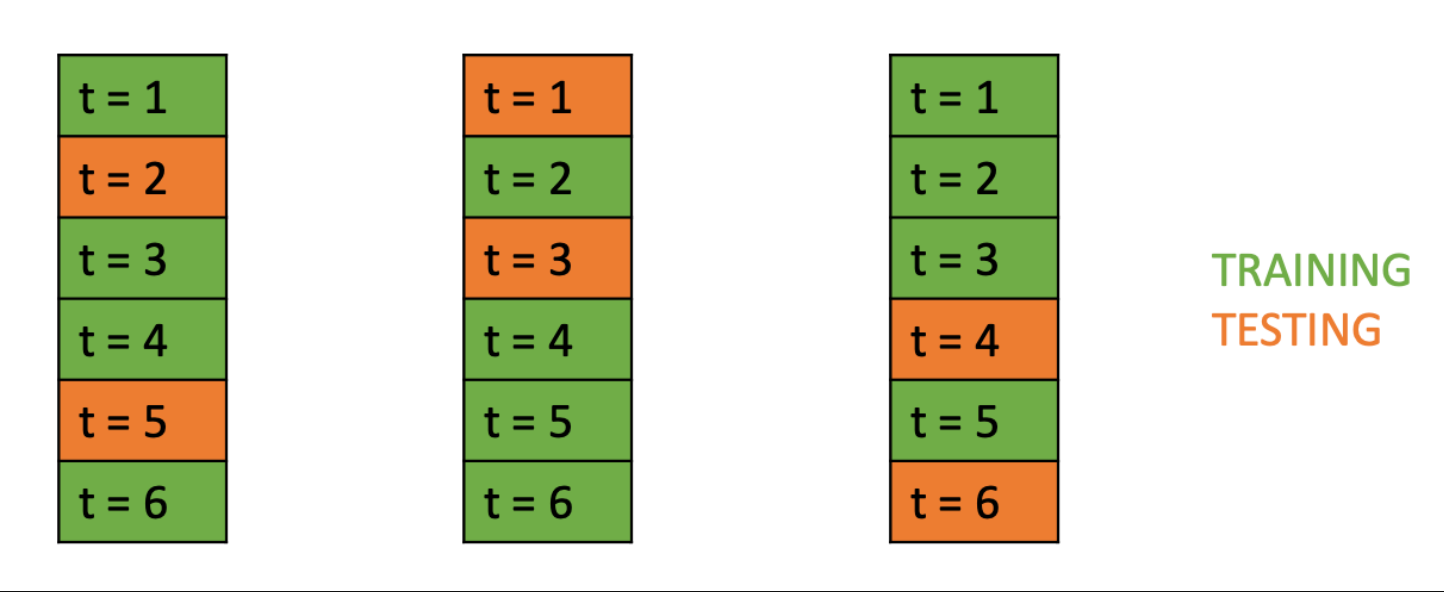

In the figure above, we see how using 3-fold validation on a simplified dataset of 6 time series points. Consider the leftmost fold. In that case we are using data from time t = 6 in our training and trying to predict what happends in t = 5. This is not indicative of what happens in reality. You will never have future information. Thus, we cannot randomly split our data. Rather we must do validation like in the following diagram. Here the, cells in white are ignored in their corresponding fold.

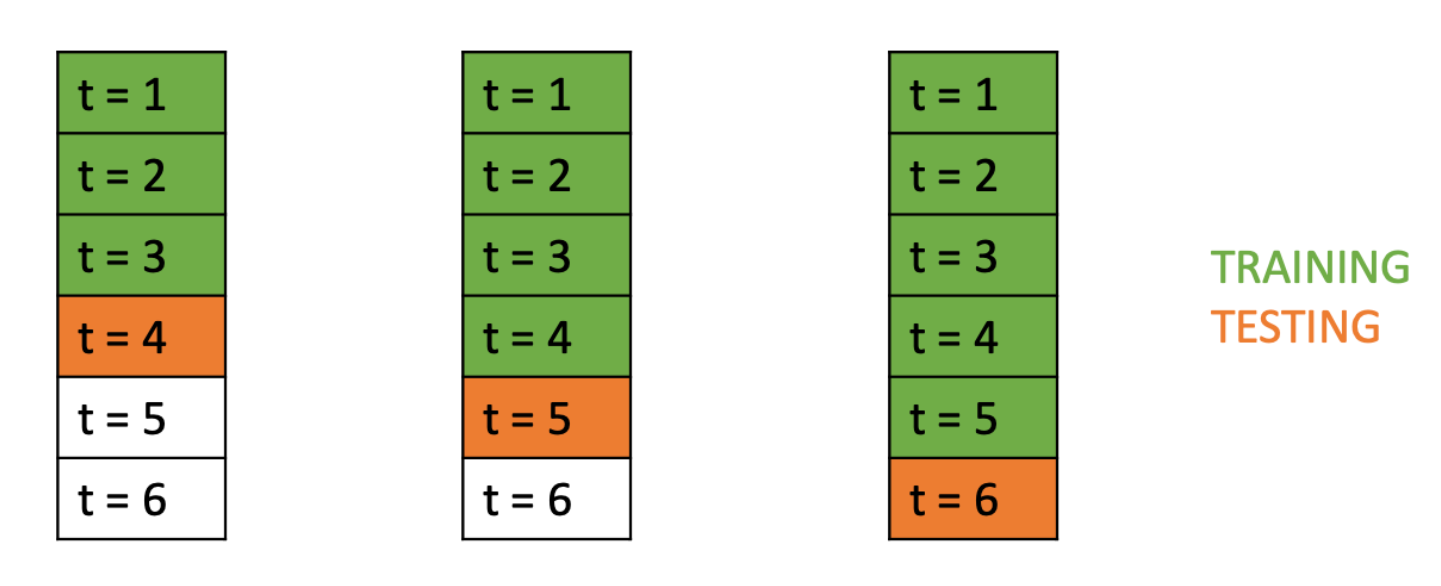

The assumption we are making here is that we are retraining the model at every time step. In some situations, we might only be able to retrain every 2 timesteps. In that case, it would make sense to include two timesteps in every fold.

# END